<a href="https://colab.research.google.com/github/AdebanjiAdelowo/Machine-Learning/blob/main/SurvivalPredictionUsingRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Passenger Survival prediction using Random Forest Classifier

Import the following 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Upload the datasets

In [2]:
from google.colab import files
files = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
p = data_train.groupby(['Embarked', 'Sex']).mean()

In [6]:
p

PassengerId  Survived    Pclass        Age     SibSp  \
Embarked Sex                                                            
C        female   437.315068  0.876712  1.726027  28.344262  0.547945   
         male     451.536842  0.305263  2.010526  32.998841  0.263158   
Q        female   374.138889  0.750000  2.888889  24.291667  0.222222   
         male     456.317073  0.073171  2.926829  30.937500  0.609756   
S        female   438.709360  0.689655  2.197044  27.771505  0.837438   
         male     454.507937  0.174603  2.421769  30.291440  0.448980   

                    Parch       Fare  
Embarked Sex                          
C        female  0.493151  75.169805  
         male    0.263158  48.262109  
Q        female  0.222222  12.634958  
         male    0.121951  13.838922  
S        female  0.788177  38.740929  
         male    0.240363  21.711996

In [7]:
p['Survived']

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

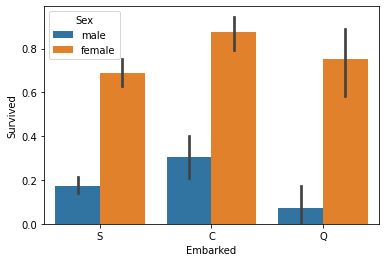

In [8]:
sns.barplot(x = "Embarked", y = "Survived", hue="Sex", data = data_train)
plt.show()

In [9]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels = group_names)
    df.Age = categories
    return df

In [10]:
data_train = simplify_ages(data_train)

In [11]:
data_train.groupby('Age').count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
Unknown,177,177,177,177,177,177,177,177,177,19,177
Baby,44,44,44,44,44,44,44,44,44,9,44
Child,25,25,25,25,25,25,25,25,25,2,25
Teenager,70,70,70,70,70,70,70,70,70,12,70
Student,162,162,162,162,162,162,162,162,162,29,162
Young Adult,196,196,196,196,196,196,196,196,196,38,196
Adult,195,195,195,195,195,195,195,195,195,84,194
Senior,22,22,22,22,22,22,22,22,22,11,21


In [12]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [13]:
data_train = simplify_cabins(data_train)

In [14]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,N,S


In [15]:
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels = group_names)
    df.Fare = categories
    return df

In [16]:
data_train = simplify_fares(data_train)

In [17]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

In [18]:
data_train = format_name(data_train)

In [19]:
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

In [20]:
data_train = drop_features(data_train)

In [21]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


The dataset can be totally transformed using the transfrom function below

```
# This is formatted as code
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df
```



In [22]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

Transform the test dataset

In [23]:
data_test = transform_features(data_test)

Let us now encode the features

In [24]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)

In [25]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [26]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,1,7,0,0,0,7,401,19
1,893,3,0,0,1,0,0,7,843,20
2,894,2,1,3,0,0,1,7,552,19
3,895,3,1,7,0,0,1,7,851,19
4,896,3,0,4,1,1,1,7,342,20


In [27]:
from sklearn.model_selection import train_test_split

data_train_X = data_train.drop(['Survived', 'PassengerId'], axis=1)
data_train_y = data_train['Survived']

num_test = 0.20

X_train, X_test, y_train, y_test = train_test_split(data_train_X, data_train_y, test_size=num_test, random_state=23)

Fitting and Tuning Machine Learning Algorithm:


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=9)

In [29]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8100558659217877


In [30]:
from sklearn.model_selection import KFold

def run_kfold(clf):

    kf = KFold(n_splits = 10)
    outcomes = []
    fold = 0

    for train_index, test_index in kf.split(data_train_X):
        fold += 1
        X_train, X_test = data_train_X.values[train_index], data_train_X.values[test_index]
        y_train, y_test = data_train_y.values[train_index], data_train_y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   

    mean_outcome = np.mean(outcomes)

    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(clf)

Fold 1 accuracy: 0.8222222222222222
Fold 2 accuracy: 0.898876404494382
Fold 3 accuracy: 0.8202247191011236
Fold 4 accuracy: 0.8426966292134831
Fold 5 accuracy: 0.8314606741573034
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7865168539325843
Fold 8 accuracy: 0.797752808988764
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.8314606741573034
Mean Accuracy: 0.8327840199750313


In [35]:
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(clf, data_train_X, data_train_y, cv=kfold)
results.mean()

0.8204494382022471

Now let us make prediction on the test dataset

In [32]:
ids = data_test['PassengerId']
test_data = data_test.drop('PassengerId', axis=1)
predictions = clf.predict(test_data.values)
output = pd.DataFrame({'PassengerId' : ids, 'Survived': predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
